In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal, ROUND_HALF_UP

In [2]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')
passengerId=test_data['PassengerId']
combine=[train_data,test_data]

In [3]:
pd.unique(train_data['SibSp'])

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 数据探索

#### 查看数据的基本信息
    
    我们可以看到训练数据中的 Age，Cabin,Embarked 存在缺失值
    
    训测试据中的 Age，Cabin,Fare 存在缺失值

In [6]:
train_data.info()
print('**'*20)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### df.describe(include=['O']) 可以帮我们计算出非数字列的一些内容

In [8]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sivic, Mr. Husein",male,1601,G6,S
freq,1,577,7,4,644


### 接下来探索特征和存活率之间的关系
    
    as_index=False 时会自动创建index，否则使用第一列作为index

__Sex__ 和 __Survived__ 之间的关系

In [9]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


__Pclass__ 和 __Survived__ 之间的关系

In [10]:
train_data.groupby(['Pclass'],as_index=False)['Pclass','Survived'].mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


__SibSp__ 和 __Survived__ 之间的关系

In [11]:
train_data.groupby(['SibSp'],as_index=False)['SibSp','Survived'].mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


__Parch__ 和 __Survived__ 之间的关系

In [12]:
train_data.groupby(['Parch'],as_index=False)['Parch','Survived'].mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 可视化展示特征和Surviced之间的关系

__Sex__ 和 __Survived__ 之间的关系展示图

    .plot.bar() 这里我们不能将as_index设为False 了

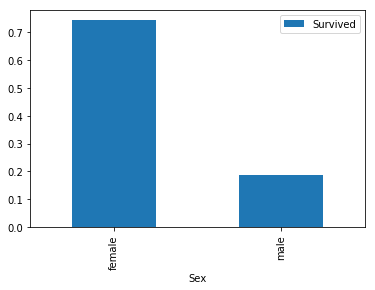

In [13]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

__Age__ 和 __Survived__ 的关系展示图

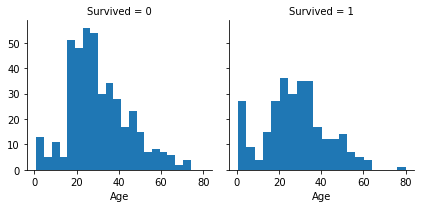

In [14]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

__Pclass__ 和 __Survived__ 的关系展示图

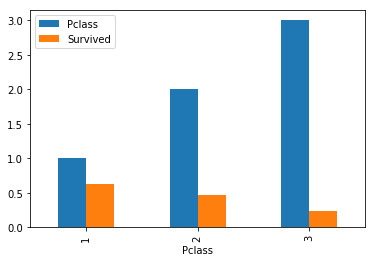

In [15]:
train_data.groupby(['Pclass'])['Pclass','Survived'].mean().plot.bar()

__Age__ __Pclass__ 和 __Survived__ 的关系展示图

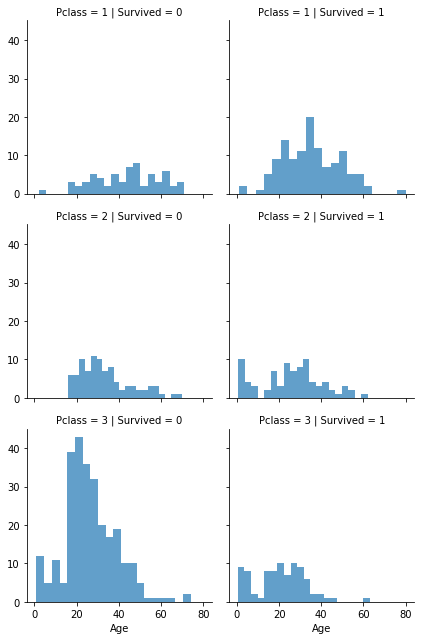

In [16]:
g=sns.FacetGrid(train_data,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20,alpha=.7)

__Age__ __Pclass__ __Sex__ 和 __Survived__ 的关系展示图

D:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


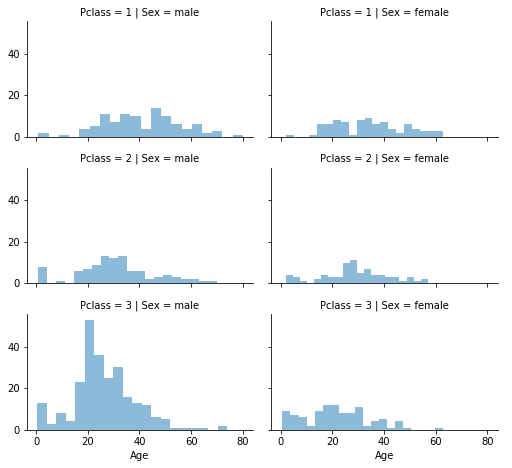

In [17]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# 特征工程

请注意，在适用的情况下，我们同时对训练和测试数据集执行操作以保持一致。

#### 因为 Cabin 的缺失值太多，Ticket 表示票号(没有意义的特征) 所以我们将这两个特征进行删除

In [18]:
print("处理前", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
combine = [train_data, test_data]

print("处理后", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

处理前 (891, 12) (418, 11) (891, 12) (418, 11)
处理后 (891, 9) (418, 8) (891, 9) (418, 8)


#### 接下来我们需要将名字简化成姓氏，因为我们也怀疑这个和存活率有关，因为名字基本上都不同所以如果不处理的话将会有很多噪音

   这里的 for dataset in combine 其实只是循环了两次，第一次是train_data 第二次是test_data数据，这样其实修改的就是我们train_data和test_data

In [19]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


接下来我们将语义相近的头衔进行合并,查看头衔和生存率之间存在的关系

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data.groupby(['Title'])[['Title','Survived']].mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


删除 __Name__ 这个特征

In [21]:
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)
combine = [train_data, test_data]

#### 对性别进行编码

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
test_data['Sex']=le.fit_transform(test_data['Sex'])
combine=[train_data,test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


#### 接下来我们对 Age，进行分类操作，目的也是为了减小噪音，但是操作之前因为Age字段存在缺失值，我们先补充缺失值

    猜测缺失值的更准确方法是使用其他相关特征。 在我们的例子中，我们注意到Age，Sex和Pclass之间的相关性。 

In [23]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
for dataset in combine:
    for i in (0,1):
        for j in range(0,3):
            no_null_age=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            median_age=no_null_age.median()
            # 将年龄进行四舍五入转为整数
            guess_ages[i,j] = Decimal(median_age).quantize(Decimal('0'), rounding=ROUND_HALF_UP)
    for i in (0,1):
        for j in range(0,3):
            """ 这里注意 要加上 'Age' 不然定位到的是一整列进行替换了，同时Age是写在loc里面"""
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age']=guess_ages[i,j]
    dataset.Age=dataset.Age.astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,Mr
1,1,1,0,38,1,0,71.2833,C,Mrs
2,1,3,0,26,0,0,7.9250,S,Miss
3,1,1,0,35,1,0,53.1000,S,Mrs
4,0,3,1,35,0,0,8.0500,S,Mr


接下来我们将 __Age__ 进行切分，因为我们想到达到的效果是： 是否会随着年纪的增加影响存活率，所以我们没有必要保留原来的值，保留的话恰恰会留下噪音

In [27]:
for dataset in combine:
    dataset['Agecut']=pd.cut(dataset['Age'],5)
train_data[['Agecut','Survived']].groupby(['Agecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Agecut,Survived
0,"(-0.004, 0.8]",0.550000
3,"(2.4, 3.2]",0.434783
2,"(1.6, 2.4]",0.412037
1,"(0.8, 1.6]",0.337374
4,"(3.2, 4.0]",0.090909


将我们切分之后数据进行编码

In [28]:
train_data['Age']=le.fit_transform(train_data['Agecut'])
test_data['Age']=le.fit_transform(test_data['Agecut'])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Agecut
0,0,3,1,1,1,0,7.2500,S,Mr,"(0.8, 1.6]"
1,1,1,0,2,1,0,71.2833,C,Mrs,"(1.6, 2.4]"
2,1,3,0,1,0,0,7.9250,S,Miss,"(0.8, 1.6]"
3,1,1,0,2,1,0,53.1000,S,Mrs,"(1.6, 2.4]"
4,0,3,1,2,0,0,8.0500,S,Mr,"(1.6, 2.4]"


之后我们就可以将 __Agecut__ 这个特征删除了

In [57]:
train_data.drop('Agecut',axis=1,inplace=True)
test_data.drop('Agecut',axis=1,inplace=True)

combine = [train_data, test_data]

#### 接下来对 SibSp 和 Parch  进行操作
接下来我们创建一个新的 __Familysize__ 特征用于表示乘船乘客带的家属数量，从而替代 __SibSp__（泰坦尼克号上的兄弟姐妹/配偶＃） 和 __Parch__（泰坦尼克号上的父母/孩子们） 这两个特征
    
    SibSp 和 Parch 对Surviced有无关系？这里我们看到当 Familysize 值对 Survived 造成的影响好像是随机的。

In [30]:
for dataset in combine:
    dataset['Familysize']=dataset['SibSp'] +dataset['Parch'] + 1 # +1 是加上自己

train_data.groupby(['Familysize'],as_index=False)[['Familysize','Survived']].mean().sort_values(by='Familysize',ascending=True)

,Familysize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


接下来我们将 __Familysize__ 转为 是一个人乘船 还是 不是一个人乘船两类

In [31]:
for dataset in combine:
    dataset['Isalone']=0
    dataset.loc[dataset['Familysize']==1,'Isalone']=1 
    dataset.loc[dataset['Familysize']!=1,'Isalone']=0 # 不是必要的 因为之前 Isalone 已经设为 0 了
    
train_data.groupby(['Isalone'],as_index=False)[['Isalone','Survived']].mean().sort_values(by='Isalone',ascending=True)

,Isalone,Survived
0,0,0.505650
1,1,0.303538


接下来我们将 __Familysize__  __SibSp__ 和 __Parch__ 这三个特征删除，使用 __Isalone__ 替代

In [32]:
train_data = train_data.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,1,1,7.2500,S,Mr,0
1,1,1,0,2,71.2833,C,Mrs,0
2,1,3,0,1,7.9250,S,Miss,1
3,1,1,0,2,53.1000,S,Mrs,0
4,0,3,1,2,8.0500,S,Mr,1


测试数据中 __Fare__ 存在 1个 缺失值，我们选择最常见的值进行填充

In [33]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mode()[0])

接着我们将Fare划分为4个等级，目的也是为了降噪,可以试一下分为五个等级，我们的训练数据中会有一项 Farecut 的 Survived 为 Nan

In [34]:
for dataset in combine:
    dataset['Farecut']=pd.cut(dataset['Fare'],4)
    
train_data[['Farecut','Survived']].groupby(['Farecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Farecut,Survived
3,"(384.247, 512.329]",1.000000
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
0,"(-0.512, 128.082]",0.368113


接下来同样进行编码

In [35]:
for dataset in combine:
    dataset['Farecut']=le.fit_transform(dataset['Farecut'])

然后将 __Fare__ 替换成 划分之后的等级

In [36]:
for dataset in combine:
    dataset['Fare']= dataset['Farecut']
    
train_data[['Farecut','Survived']].groupby(['Farecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Farecut,Survived
3,3,1.000000
1,1,0.724138
2,2,0.666667
0,0,0.368113


删除 __Farecut__ 特征

In [37]:
train_data.drop('Farecut',axis=1,inplace=True)
test_data.drop('Farecut',axis=1,inplace=True)
combine=[train_data,test_data]

训练数据中 __Embarked__ 存在 2个 缺失值，我们选择最常见的值进行填充

In [38]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

接下来将 __Embarked__ 和 __Title__ 替换成标签

In [40]:
for dataset in combine:
    dataset['Title'] = le.fit_transform(dataset['Title']) 
    dataset['Embarked'] = le.fit_transform(dataset['Embarked']) 

In [41]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,1,1,0,2,2,0
1,1,1,0,2,0,0,3,0
2,1,3,0,1,0,2,1,1
3,1,1,0,2,0,2,3,0
4,0,3,1,2,0,2,2,1


In [58]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,3,1,2,0,1,2,1
1,3,0,3,0,2,3,0
2,2,1,4,0,1,2,1
3,3,1,1,0,2,2,1
4,3,0,1,0,2,3,0


#### 接下来将一些无序特征进行 onehot 编码

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
# train_data=ohe.fit_transform(train_data)

In [63]:
Sex_ohe=ohe.fit_transform(train_data[['Sex']].values.reshape(-1, 1)).toarray()

In [65]:
Isalone_ohe=ohe.fit_transform(train_data[['Isalone']].values.reshape(-1, 1)).toarray()

In [61]:
Embarked_ohe=ohe.fit_transform(train_data[['Embarked']].values.reshape(-1, 1)).toarray()

In [62]:
Title_ohe=ohe.fit_transform(train_data[['Title']].values.reshape(-1, 1)).toarray()

In [66]:
Sex_ohe = pd.DataFrame(Sex_ohe, columns=["Sex" + str(int(i)) for i in range(Sex_ohe.shape[1])])
Isalone_ohe = pd.DataFrame(Isalone_ohe, columns=["Isalone" + str(int(i)) for i in range(Isalone_ohe.shape[1])])
Embarked_ohe = pd.DataFrame(Embarked_ohe, columns=["Embarked" + str(int(i)) for i in range(Embarked_ohe.shape[1])])
Title_ohe = pd.DataFrame(Title_ohe, columns=["Title" + str(int(i)) for i in range(Title_ohe.shape[1])])

In [68]:
df = pd.concat([train_data[['Pclass','Age','Fare']], Sex_ohe,Isalone_ohe,Embarked_ohe,Title_ohe], axis=1)

In [70]:
df.head()

,Pclass,Age,Fare,Sex0,Sex1,Isalone0,Isalone1,Embarked0,Embarked1,Embarked2,Title0,Title1,Title2,Title3,Title4
0,3,1,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,2,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,2,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### 使用热力图观察各个特征之间的相关性

In [ ]:
# colormap = plt.cm.RdBu

# # train_data=train_data.drop('PassengerId',axis=1)
# corrmat=train_data.corr()
# fig,ax=plt.subplots()
# sns.heatmap(corrmat,cmp=colormap,annot=True,)